# Example Calculation of the Change in Load Peakiness Across Scenarios


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


## Set the Directory Structure


In [2]:
# Identify the data input and image output directories:
data_input_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Production_Runs/tell_data/outputs/tell_output/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2023_applied_energy/figures/'


## Set the BA and Base Year to Plot


In [3]:
# Set the BA you want to plot:
ba_to_plot = 'PJM'

# Set the weather year you want to plot:
base_year_to_plot = 2010


## Process the Data


In [4]:
# Read in and process the historical load duration curve:
ba_historic_df = pd.read_csv(data_input_dir + 'historic/' + str(base_year_to_plot) + '/TELL_Balancing_Authority_Hourly_Load_Data_' + str(base_year_to_plot) + '_Scaled_' + str(base_year_to_plot) + '.csv')
ba_historic_df = ba_historic_df[ba_historic_df['BA_Code'] == ba_to_plot].copy()
ba_historic_df['Load_Normalized'] = (ba_historic_df['Scaled_TELL_BA_Load_MWh'] / ba_historic_df['Scaled_TELL_BA_Load_MWh'].max())
ba_historic_df = ba_historic_df.sort_values(by=['Load_Normalized'], ascending=False)
ba_historic_df['Interval'] = 1
ba_historic_df['Duration'] = ba_historic_df['Interval'].cumsum()
ba_historic_df = ba_historic_df[['Load_Normalized', 'Duration']].copy()

# Read in and process the rcp45cooler_ssp5 load duration curve:
ba_rcp45cooler_ssp5_df = pd.read_csv(data_input_dir + 'rcp45cooler_ssp5/' + str(base_year_to_plot + 80) + '/TELL_Balancing_Authority_Hourly_Load_Data_' + str(base_year_to_plot + 80) + '_Scaled_' + str(base_year_to_plot + 80) + '.csv')
ba_rcp45cooler_ssp5_df = ba_rcp45cooler_ssp5_df[ba_rcp45cooler_ssp5_df['BA_Code'] == ba_to_plot].copy()
ba_rcp45cooler_ssp5_df['Load_Normalized'] = (ba_rcp45cooler_ssp5_df['Scaled_TELL_BA_Load_MWh'] / ba_rcp45cooler_ssp5_df['Scaled_TELL_BA_Load_MWh'].max())
ba_rcp45cooler_ssp5_df = ba_rcp45cooler_ssp5_df.sort_values(by=['Load_Normalized'], ascending=False)
ba_rcp45cooler_ssp5_df['Interval'] = 1
ba_rcp45cooler_ssp5_df['Duration'] = ba_rcp45cooler_ssp5_df['Interval'].cumsum()
ba_rcp45cooler_ssp5_df = ba_rcp45cooler_ssp5_df[['Load_Normalized', 'Duration']].copy()

# Read in and process the rcp45hotter_ssp5 load duration curve:
ba_rcp45hotter_ssp5_df = pd.read_csv(data_input_dir + 'rcp45hotter_ssp5/' + str(base_year_to_plot + 80) + '/TELL_Balancing_Authority_Hourly_Load_Data_' + str(base_year_to_plot + 80) + '_Scaled_' + str(base_year_to_plot + 80) + '.csv')
ba_rcp45hotter_ssp5_df = ba_rcp45hotter_ssp5_df[ba_rcp45hotter_ssp5_df['BA_Code'] == ba_to_plot].copy()
ba_rcp45hotter_ssp5_df['Load_Normalized'] = (ba_rcp45hotter_ssp5_df['Scaled_TELL_BA_Load_MWh'] / ba_rcp45hotter_ssp5_df['Scaled_TELL_BA_Load_MWh'].max())
ba_rcp45hotter_ssp5_df = ba_rcp45hotter_ssp5_df.sort_values(by=['Load_Normalized'], ascending=False)
ba_rcp45hotter_ssp5_df['Interval'] = 1
ba_rcp45hotter_ssp5_df['Duration'] = ba_rcp45hotter_ssp5_df['Interval'].cumsum()
ba_rcp45hotter_ssp5_df = ba_rcp45hotter_ssp5_df[['Load_Normalized', 'Duration']].copy()

# Read in and process the rcp85cooler_ssp5 load duration curve:
ba_rcp85cooler_ssp5_df = pd.read_csv(data_input_dir + 'rcp85cooler_ssp5/' + str(base_year_to_plot + 80) + '/TELL_Balancing_Authority_Hourly_Load_Data_' + str(base_year_to_plot + 80) + '_Scaled_' + str(base_year_to_plot + 80) + '.csv')
ba_rcp85cooler_ssp5_df = ba_rcp85cooler_ssp5_df[ba_rcp85cooler_ssp5_df['BA_Code'] == ba_to_plot].copy()
ba_rcp85cooler_ssp5_df['Load_Normalized'] = (ba_rcp85cooler_ssp5_df['Scaled_TELL_BA_Load_MWh'] / ba_rcp85cooler_ssp5_df['Scaled_TELL_BA_Load_MWh'].max())
ba_rcp85cooler_ssp5_df = ba_rcp85cooler_ssp5_df.sort_values(by=['Load_Normalized'], ascending=False)
ba_rcp85cooler_ssp5_df['Interval'] = 1
ba_rcp85cooler_ssp5_df['Duration'] = ba_rcp85cooler_ssp5_df['Interval'].cumsum()
ba_rcp85cooler_ssp5_df = ba_rcp85cooler_ssp5_df[['Load_Normalized', 'Duration']].copy()

# Read in and process the rcp85hotter_ssp5 load duration curve:
ba_rcp85hotter_ssp5_df = pd.read_csv(data_input_dir + 'rcp85hotter_ssp5/' + str(base_year_to_plot + 80) + '/TELL_Balancing_Authority_Hourly_Load_Data_' + str(base_year_to_plot + 80) + '_Scaled_' + str(base_year_to_plot + 80) + '.csv')
ba_rcp85hotter_ssp5_df = ba_rcp85hotter_ssp5_df[ba_rcp85hotter_ssp5_df['BA_Code'] == ba_to_plot].copy()
ba_rcp85hotter_ssp5_df['Load_Normalized'] = (ba_rcp85hotter_ssp5_df['Scaled_TELL_BA_Load_MWh'] / ba_rcp85hotter_ssp5_df['Scaled_TELL_BA_Load_MWh'].max())
ba_rcp85hotter_ssp5_df = ba_rcp85hotter_ssp5_df.sort_values(by=['Load_Normalized'], ascending=False)
ba_rcp85hotter_ssp5_df['Interval'] = 1
ba_rcp85hotter_ssp5_df['Duration'] = ba_rcp85hotter_ssp5_df['Interval'].cumsum()
ba_rcp85hotter_ssp5_df = ba_rcp85hotter_ssp5_df[['Load_Normalized', 'Duration']].copy()


## Make the Plot


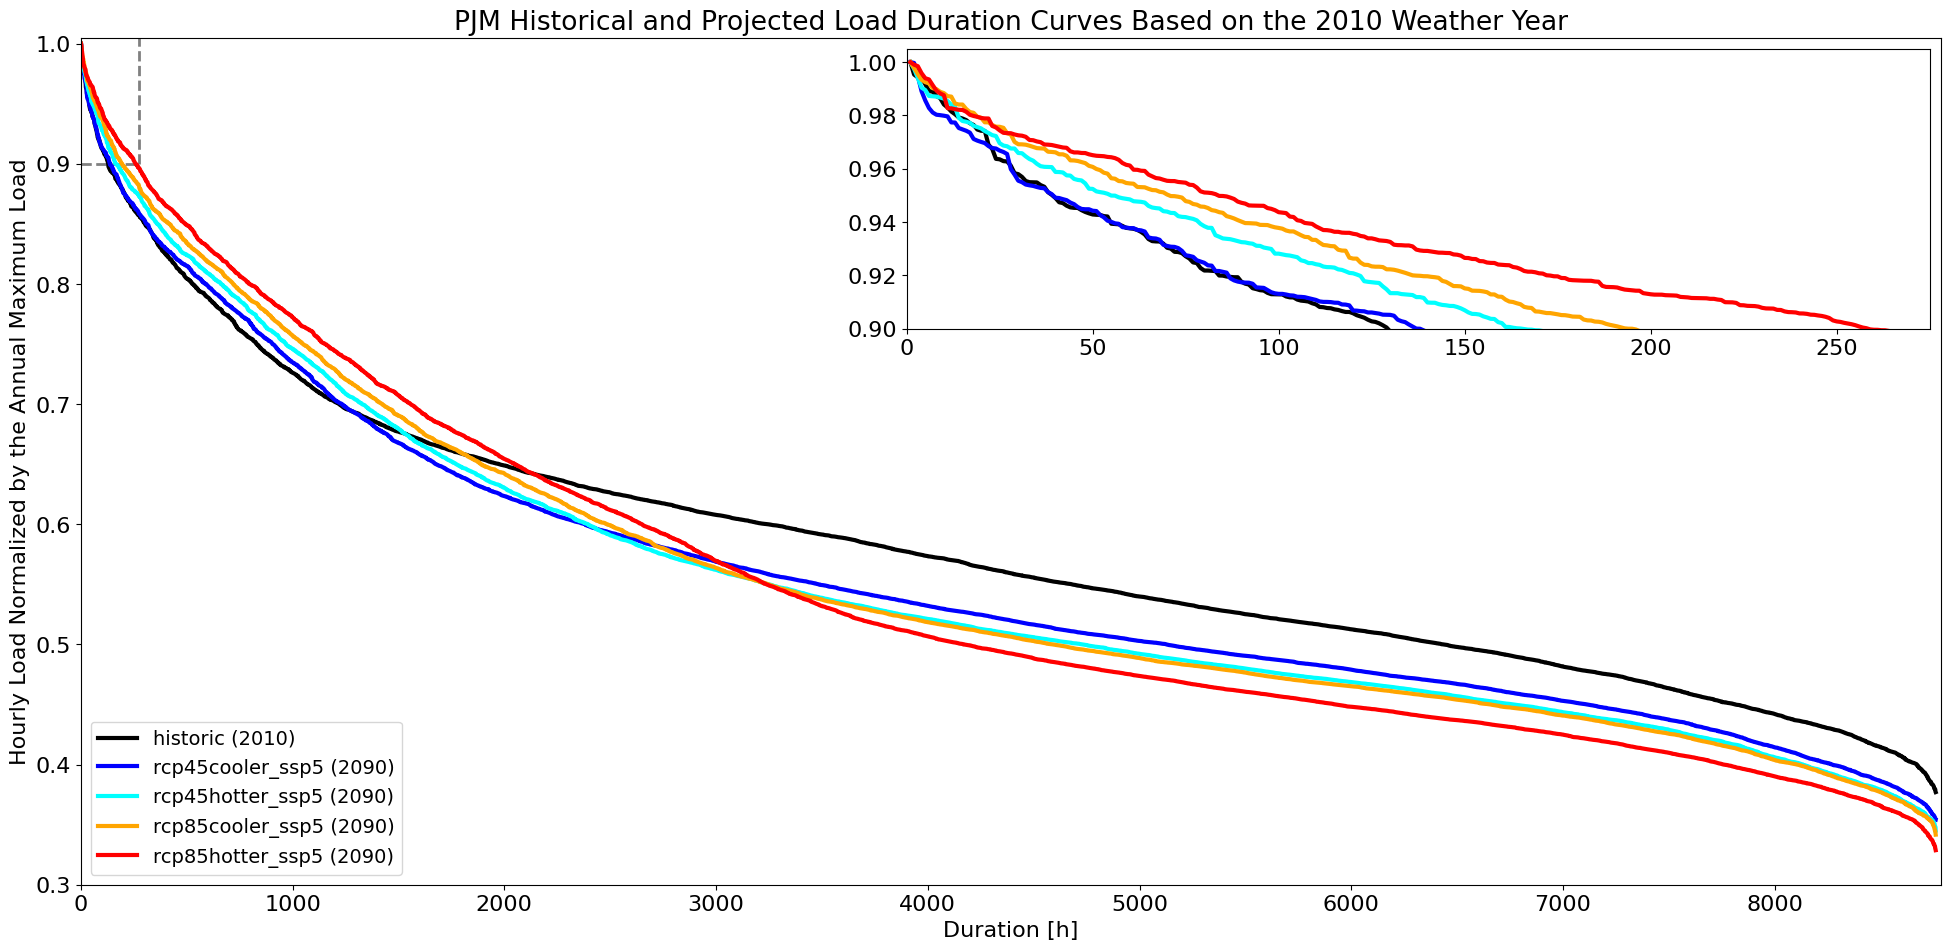

In [5]:
# Make the plot:
fig = plt.figure(figsize=(24, 11))
plt.rcParams.update({'font.size': 16})

ax1 = fig.add_subplot(111)
ax1.plot([0,275], [0.9,0.9], color='gray', linestyle='--', linewidth=2)
ax1.plot([275,275], [0.9,1.005], color='gray', linestyle='--', linewidth=2)
ax1.plot(ba_historic_df['Duration'], ba_historic_df['Load_Normalized'], color='black', linestyle='-', label='historic (2010)', linewidth=3)
ax1.plot(ba_rcp45cooler_ssp5_df['Duration'], ba_rcp45cooler_ssp5_df['Load_Normalized'], color='blue', linestyle='-', label='rcp45cooler_ssp5 (2090)', linewidth=3)
ax1.plot(ba_rcp45hotter_ssp5_df['Duration'], ba_rcp45hotter_ssp5_df['Load_Normalized'], color='cyan', linestyle='-', label='rcp45hotter_ssp5 (2090)', linewidth=3)
ax1.plot(ba_rcp85cooler_ssp5_df['Duration'], ba_rcp85cooler_ssp5_df['Load_Normalized'], color='orange', linestyle='-', label='rcp85cooler_ssp5 (2090)', linewidth=3)
ax1.plot(ba_rcp85hotter_ssp5_df['Duration'], ba_rcp85hotter_ssp5_df['Load_Normalized'], color='red', linestyle='-', label='rcp85hotter_ssp5 (2090)', linewidth=3)
ax1.legend(loc='lower left', prop={'size': 14})
ax1.set(xlim=(0, 8784), ylim=(0.3, 1.005))
ax1.set(xlabel = 'Duration [h]', ylabel = 'Hourly Load Normalized by the Annual Maximum Load')
ax1.set(title = (ba_to_plot + ' Historical and Projected Load Duration Curves Based on the ' + str(base_year_to_plot) + ' Weather Year'))

ax2 = inset_axes(ax1, width="55%", height=2.8, loc=1)
ax2.plot(ba_historic_df['Duration'], ba_historic_df['Load_Normalized'], color='black', linestyle='-', label='historic', linewidth=3)
ax2.plot(ba_rcp45cooler_ssp5_df['Duration'], ba_rcp45cooler_ssp5_df['Load_Normalized'], color='blue', linestyle='-', label='rcp45cooler_ssp5', linewidth=3)
ax2.plot(ba_rcp45hotter_ssp5_df['Duration'], ba_rcp45hotter_ssp5_df['Load_Normalized'], color='cyan', linestyle='-', label='rcp45hotter_ssp5', linewidth=3)
ax2.plot(ba_rcp85cooler_ssp5_df['Duration'], ba_rcp85cooler_ssp5_df['Load_Normalized'], color='orange', linestyle='-', label='rcp85cooler_ssp5', linewidth=3)
ax2.plot(ba_rcp85hotter_ssp5_df['Duration'], ba_rcp85hotter_ssp5_df['Load_Normalized'], color='red', linestyle='-', label='rcp85hotter_ssp5', linewidth=3)
ax2.set(xlim=(0, 275), ylim=(0.9, 1.005))

filename = ('Peakiness_Calculation.png')
plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')
